### Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
linear system:
The state equation, Xk+1 = (A * Xk) + (B*Uk) + Wk
The output equation, Yk = (C*Xk) + Zk

x is the ‘state of the system  ==> This is what we’re trying to estimate
k is the time index  
u is a known input to the system
y is some sort of measurement on the system
 
noise:
w is the process noise         ==> (noise occurring naturally due to instabilities of the system) 
z is the measurement noise     ==> (noise in the measuring system we are using)


A, B and C are matrices:
A is known as the ‘State Transition Matrix’ which applies the effect of each system state parameter at time k on the system state at time k+1.  
B is the control matrix which applies the effect of each control input parameter on the state vector.
C is a matrix that maps the state vector parameters into the measurement domain
A = np.array([[1, 0.1],[0, 1]])
B = np.array([0.005, 0.1]).reshape((2, 1))
C = np.array([1, 0])     


K The matrix ‘K’ is called the Kalman gain
P is called the estimation error covariance
X is the estimate for the state
#     K = A * P * (C ** T) * (C * P * (C ** T) + S) ** (−1)
#     X = (A * X + B * U) + K (Y − C * X )
#     P = A * P * (𝐴 ** 𝑇) + S − (A * P * (𝐶 ** 𝑇) * (S ** (−1)) * C * P * (A ** T)            
"""

'\nlinear system:\nThe state equation, Xk+1 = (A * Xk) + (B*Uk) + Wk\nThe output equation, Yk = (C*Xk) + Zk\n\nx is the ‘state of the system  ==> This is what we’re trying to estimate\nk is the time index  \nu is a known input to the system\ny is some sort of measurement on the system\n \nnoise:\nw is the process noise         ==> (noise occurring naturally due to instabilities of the system) \nz is the measurement noise     ==> (noise in the measuring system we are using)\n\n\nA, B and C are matrices:\nA is known as the ‘State Transition Matrix’ which applies the effect of each system state parameter at time k on the system state at time k+1.  \nB is the control matrix which applies the effect of each control input parameter on the state vector.\nC is a matrix that maps the state vector parameters into the measurement domain\nA = np.array([[1, 0.1],[0, 1]])\nB = np.array([0.005, 0.1]).reshape((2, 1))\nC = np.array([1, 0])     \n\n\nK The matrix ‘K’ is called the Kalman gain\nP is call

### Upload the data from the excel file

In [3]:
df = pd.read_excel("KF_Assignment_data.xlsx") 
df

,Measured position data,Corrected position data after KF
0,2.004,0.000
1,-7.464,0.005
2,7.216,0.020
3,-5.316,0.045
4,-4.486,0.080
...,...,...
996,4964.000,4970.000
997,4974.000,4980.000
998,4984.000,4990.000
999,4998.000,5000.000


## Kalman Filter

In [5]:
acceleration_noise = 0.2                       # The standard deviation of acceleration is 0.2 m/s^2
time_interval = 0.1                            # 0.1 seconds

# x is state of the system and u is a known input to the system
u = 1.0                                        # initial input (acceleration is 1 m/s^2)
x = np.array([[0],[0]])                        # initial position is 0 and initial speed is 0 too
                                    
    
# A, B and C are matrices:
A = np.array([[1, 0.1],                        # A is the State Transition Matrix
              [0, 1]])

B = np.array([0.005, 0.1]).reshape((2, 1))     # B is the control matrix

C = np.array([[1, 0]])                         # C is state vector parameters


## Noise Covariance matrices
variance_position_noise   = 10**-6              # variance of position noise 
variance_velocity_noise   = 4*10**-4            # variance of velocity noise 
covariance_position_noise = 2*10**-5            # covariance of position noise
covariance_velocity_noise = 2*10**-5            # covariance of velocity noise

std_position_noise = np.sqrt(variance_position_noise)    # standard deviation of position noise
std_velocity_noise = np.sqrt(variance_velocity_noise)    # standard deviation of velocity noise


w = np.array([[std_position_noise],            # w is the process noise
              [std_velocity_noise]])

z = np.array([[10]])                           # The standard deviation of GPS or the error of GPS is 10

# The process noise covariance matrices are Sw and Sz:
Sw = np.array([[10**-6, 2*10**-5], [2*10**-5, 4*10**-4]])
                  
Sz = np.array([[10 * 10]])                     # The measurement noise 

P = Sw                                         # P is the estimation error covariance
   
KF_estimate_list = []                          # The list to save values that the Kalman filter will predict

for y in df['Measured position data']:
    
    # calculate K
    K = A.dot(P).dot(C.T).dot(np.linalg.inv(C.dot(P).dot(C.T) + Sz))
 
    # calculate x
    x = A.dot(x) + B*u + K.dot(y - C.dot(x))
    KF_estimate_list.append(x[0, 0])
    
    # calculate P
    P = (np.eye(2) - K.dot(C)).dot(P).dot((np.eye(2) - K.dot(C)).T) + K.dot(Sz).dot(K.T)

### Plot measured position data and Kalman filter estimation 

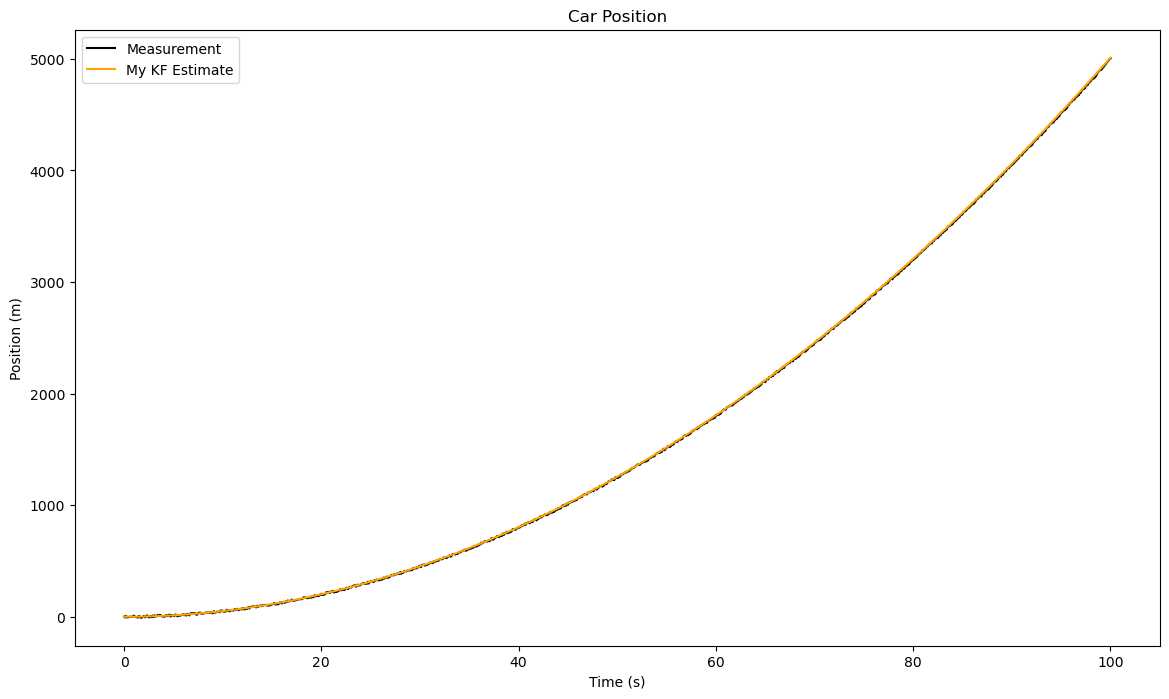

In [9]:
KF_range = np.arange(0, 100.1, 0.1)  # time interval is 0.1 seconds

plt.figure(figsize=(14,8))
plt.plot(KF_range, df["Measured position data"], color="k")
plt.plot(KF_range, KF_estimate_list, color="orange")
plt.title("Car Position")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend(labels=["Measurement", "My KF Estimate"])

plt.show()

### See all values of the Kalman filter (I added My KF estimate to the data frame)

In [10]:
df["My KF Estimate"] = KF_estimate_list
df

,Measured position data,Corrected position data after KF,My KF Estimate
0,2.004,0.000,0.005000
1,-7.464,0.005,0.020000
2,7.216,0.020,0.045000
3,-5.316,0.045,0.080000
4,-4.486,0.080,0.125000
...,...,...,...
996,4964.000,4970.000,4970.041282
997,4974.000,4980.000,4980.016277
998,4984.000,4990.000,4990.001271
999,4998.000,5000.000,4999.996266


### To print entire data frame

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

      Measured position data  Corrected position data after KF  My KF Estimate
0                      2.004                             0.000        0.005000
1                     -7.464                             0.005        0.020000
2                      7.216                             0.020        0.045000
3                     -5.316                             0.045        0.080000
4                     -4.486                             0.080        0.125000
5                     -3.690                             0.125        0.179999
6                      1.747                             0.180        0.244999
7                     -1.116                             0.245        0.319999
8                     -1.802                             0.320        0.404999
9                      5.635                             0.405        0.499999
10                    10.122                             0.500        0.604999
11                     0.860                        